---
title: Model Selection
layout: collection
permalink: /Computational-Biology/Model-Selection
collection: Computational-Biology
mathjax: true
toc: true
categories:
  - study
tags:
  - mathematics
  - statistics
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
sns.set_theme()

Dependence in gene presence

Assume we're analyzing the presence of two genes in n different genomes. Each gene can then either be present or not present in each genome.
Thus we get a table with the presence of the genes ($n_{AB}$). 

|        | Gene A           |                 |                  |
|--------|------------------|-----------------|------------------|
| Gene B | $n_{++}$         | $n_{-+}$        | $n_{.+}$ present |
|        | $n_{+-}$         | $n_{--}$        | $n_{.-}$ absent  |
|        | $n_{+.}$ present | $n_{-.}$ absent |   |

From these counts we would then like to be able to determine how likely it is that the presence of these genes is independent of each other compared to how likely it is that their presence is determined in some dependant way. For this we assume two models and compare them

1. **The independent model**

In each genome, there are independent probabilities $\rho_A$ that gene A is present and $\rho_B$ that gene B is present. The probabilities for the table are then given by 

|                       |                             |
|-----------------------|-----------------------------|
| $\rho_A \rho_B$       | $\rho_B (1 - \rho_A)$       |
| $\rho_A (1 - \rho_B)$ | $(1 - \rho_B) (1 - \rho_A)$ |

Here we use a uniform prior 

$$
\mathbb{P}(\rho_A, \rho_B) = \int_{0}^{1} \int_{0}^{1} d \rho_A d\rho_B = \int_{0}^{1} d \rho_A \int_{0}^{1}   d\rho_B  = 1 * 1 = 1
$$

2. **The dependent model**

There are seperate probabilities for each combination. The probabilities for the table are given by 

|                   |                                                  |
|-------------------|--------------------------------------------------|
| $\rho_{AB}$       | $\rho_{\bar{A}B}$                                |
| $\rho_{A\bar{B}}$ | 1 -   $\rho_{\bar{A}B}$ -   $\rho_{A\bar{B}}$ -  $\rho_{AB}$|

Here we use a uniform prior 

$$ 
\mathbb{P}(\rho_{AB}, \rho_{\bar{A}B}, \rho_{A\bar{B}}) = 3!
$$

Because the 3! comes from integrating over all possible possibilities

$$
\int_0^{1 - \rho_{AB} - \rho_{A\bar{B}}} d \rho_{\bar{A}\bar{B}} \int_0^{1 - \rho_{AB}} d \rho_{A\bar{B}}  \int_0^1 d \rho_{AB} 
$$

### Dirichlet integral

We use a uniform prior $ \mathbb{P}(\mathbf{\rho}) = (k - 1)!$. 
The likelihood is given by $\mathbb{P}(\mathcal{D} | \mathbf{\rho}) = \prod_{k=1}^K (\rho_k)^{n_k}$. 
The likelihood of the model is then

$$
\begin{align*}
    \mathbb{P}(\mathcal{D}) 
    &= 
    \int \mathbb{P}(\mathbf{\rho}) \mathbb{P}(\mathcal{D} | \mathbf{\rho}) d \mathbf{\rho} \\
    &= 
    \int \prod_{k=1}^K (\rho_k)^{n_k} (K - 1)! d \mathbf{\rho} = \frac{(K-1)!}{(N + K - 1)!} \prod_{k=1}^K n_k!
\end{align*}

$$

Then General form of the dirichlet distribution is given by

$$
\frac{1}{B(\mathbf{\alpha})} \prod_{i=1}^K x_i^{\alpha_i - 1}, \quad B(\mathbf{\alpha}) = \frac{\prod_{i=1}^K \Gamma(\alpha_i)}{\Gamma \left( \sum_{i=1}^K \alpha_i \right)}
$$

Integrating this with $x_k = \rho_k$ and $\alpha_k - 1 = n_k$ we get

$$
\begin{align*}
    \int \prod_{k=1}^K \rho_k^{n_k} d \mathbf{\rho}
    &=
    \frac{B(\mathbf{n})}{B(\mathbf{n})} \int \prod_{k=1}^K \rho_k^{n_k} d \mathbf{\rho} \\
    &=
    B(\mathbf{n}) \\
    &=
    \frac{\prod_{k=1}^K \Gamma(n_k + 1)}{\Gamma(\sum_{k=1}^K n_k + 1)} \\
    &=
    \frac{1}{\Gamma(\sum_{k=1}^K n_k + 1)} \prod_{k=1}^K n_k \\
    &=
    \frac{1}{\Gamma(N + K)} \prod_{k=1}^K n_k \\
    &=
    \frac{1}{(N + K - 1)!} \prod_{k=1}^K n_k \\
\end{align*}
$$

Using this dirichlet integral identity we can get our prior constant. For $\alpha_k = 1$, $K = 4$ (we have 4 paremeters $\rho_{AB}, \rho_{A\bar{B}}, \rho_{\bar{A}B}, \rho_{\bar{A}\bar{B}}$, but $\rho_{\bar{A}\bar{B}}$ is fixed when setting the other three which is why our distribution only considers the first three but we still need to integrate over all in the dirichlet) we get 

$$
\int \prod_{k=1}^4 \rho_k^{n_k} d \mathbf{\rho} = B(\mathbf{\alpha}) = \frac{\prod_{k=1}^K \Gamma(\alpha_k)}{\Gamma(\sum_{k=1}^K \alpha_k)} = \frac{1}{(K - 1)!} = \frac{1}{3!}
$$

For our problem we get then

$$
\begin{align*}
    \mathbb{P}(\mathcal{D} | indep) 
    &= 
    \int_{0}^1 (\rho_A \rho_B)^{n_{++}} (\rho_A (1 - \rho_B))^{n_{+-}} ((1 - \rho_A) \rho_B )^{n_{-+}} ((1 - \rho_A) (1 - \rho_B))^{n_{--}} d \rho_A \rho_B \\
    &=
     \int_{0}^1 \rho_A^{n_{++}+ n_{+-}} (1 - \rho_A)^{n_{-+} + n_{--}} d \rho_A  \int_{0}^1 \rho_B^{n_{++} + n_{-+}} (1 - \rho_B)^{n_{+-} + n_{--}} \rho_B \\
     &=
     \int_{0}^1 \rho_A^{n_{+.}} (1 - \rho_A)^{n_{-.}} d \rho_A  \int_{0}^1 \rho_B^{n_{.+}} (1 - \rho_B)^{n_{.-}} \rho_B \\
     &= 
     \frac{n_{+.}! n_{-.}! n_{.+}! n_{.-}!}{(n+1)!(n+1)!} 
     \frac{}{}
\end{align*}
$$

and 

$$
\begin{align*}
    \mathbb{P}(\mathcal{D} | dep) 
    &= 
    3! \int_0^1 d \rho_{AB} \int_0^{1 - \rho_{AB}} d \rho_{A\bar{B}} \int_0^{1 - \rho_{AB} - \rho_{A\bar{B}}} \rho_{AB}^{n_{++}} \rho_{A\bar{B}}^{n_{+-}}  \rho_{\bar{A}B}^{n_{-+}} (1 - \rho_{AB} - \rho_{A\bar{B}} - \rho_{\bar{A}B})^{n_{--}} d \rho_{A\bar{B}} \\
    &=
    \frac{3! n_{++}! n_{+-}! n_{-+}!n_{--}!}{(n+3)!}
\end{align*} 
$$

We then want to calculate the posterior, i.e. the probability of our model being dependent / independent given our data. 
We assign equal priors to the genes being dependent or independent ( $ \mathbb{P}(dep | I) = \mathbb{P}(indep | I) = \frac{1}{2} $), and we calculate the posterior

$$
\mathbb{P}(dep | \mathcal{D}) = \frac{\mathbb{P}(\mathcal{D} | dep, I) \mathbb{P}(dep | I)}{\mathbb{P}(\mathcal{D} | dep, I) \mathbb{P}(dep | I) + \mathbb{P}(\mathcal{D} | indep, I) \mathbb{P}(indep | I)}
$$

Often the probability of the dependence is high even though the model is clearly independent. There is always a dependent mopdel that fits the data at least as well as any indepentent model, because we can always set $\rho_{AB} = \rho_{A} \rho_{B}$. Thus any independent model can be reproduced by a dependent model.
The question then remains, when do we choose which?

The space occupied by the distribution of our parameters $ \mathbb{P}(\mathcal{D} | \rho_{AB}, \rho_{A\bar{B}}, \rho_{\bar{A}B})$ is a so called simplex. 
The probability of the dependent model is then the average probability of the data when integrating over the parameter space.

$$
\mathbb{P}(\mathcal{D} | dep) = \int \mathbb{P}(\mathcal{D} | \rho_{AB}, \rho_{A\bar{B}}, \rho_{\bar{A}B}) d \rho_{AB} d \rho_{A\bar{B}} d \rho_{\bar{A}B}
$$

The probability of the independent model is then a hypersurface which occupies a part of the parameter space in this simplex, where $\rho_{AB} = \rho_A \rho_B$. The probability of the independent model is then the average probability of the data when integrating over the parameter space.

$$
\mathbb{P}(\mathcal{D} | indep) = \int \mathbb{P}(\mathcal{D} | \rho_A, \rho_B) d\rho_A d \rho_B
$$

Thus the independent model space is always a subset of the dependent model space. If we now have our MLE in this space, if it is on the independent hyperplane surface, the independent model tends to have a higher probability compared to the dependent model and vice versa. This is due to the fact that the dependent model space is much larger, thus we average over a much larger space compared to the independent model.



### Model Comparison

Given the probability of the data under the model $M_i$ ($ \mathbb{P}(\mathcal{D}|M_i)$ ), 
which is the average over all the parameters of the model 
($ \mathbb{P}(\mathcal{D} |M_i) = \int \mathbb{P}(\mathcal{D} | \theta, M_i) d\theta $).
The maximum likelihood over the parameters is given by $ \mathbb{P}(\mathcal{D} | \theta_*, M_i) = max_{\theta} \left[ \mathbb{P}(\mathcal{D} | \theta, M_i) \right]$. The probability of the model is then given by 

$$
\mathbb{P}(\mathcal{D} | M_i ) = \mathbb{P}(\mathcal{D} | \theta_*, M_i) f(M_i)
$$

Where $f(M_i) = \frac{1}{\mathbb{P}(\mathcal{D} | \theta_*, M_i)} \int \mathbb{P}(\mathcal{D} | \theta, M_i) d\theta$ which can be seen as the fraction of the volume of the parameter space that supports maximum / high likelihood. 
A narrow peak in the parameter space means that the high likelihood is confined to a few parameter 'options' (few models fit the data well), which causes the fraction to become close to one as both the MLE and the integral are close to eachother.
A broad peak in the parameter space means that the high likelihood happens for alot of parameter 'options' (alot of different models fit the data well), which causes the fraction to become small.
The relative probability of two model depends both on the ratio of the maximum likelihood and the so called ***Occam factor*** which measures what fraction of parameters support that likelihood

$$
\frac{\mathbb{P}(M_i | \mathcal{D} )}{\mathbb{P}(M_j | \mathcal{D} )}
=
\frac{\mathbb{P}(\mathcal{D} | \theta_*, M_i ) }{\mathbb{P}(\mathcal{D} | \theta_*, M_j ) } \underbrace{\frac{f(M_i)}{f(M_j)}}_{\text{Occam factor}}
$$

The first ratio is the ratio of probability of our best likelihoods, the ratio of our best models. The second ratio, a.k.a the occams factor is the ratio of the parameter space of the models which support this high likelihood. A simple model often has a higher fraction compared to the more complex model, as the space of the simple model is much smaller, creating more density close to the MLE.

When we then want to select our model we look at the occam factor

$$
\frac{f(M_i)}{f(M_j)} > 1 \Rightarrow f(M_i) > f(M_j)
$$

Because the fraction of model $M_i$ is larger then the fraction for model $M_j$, model $M_i$ is the preferred model. 
Same reasoning holds for the inverse.

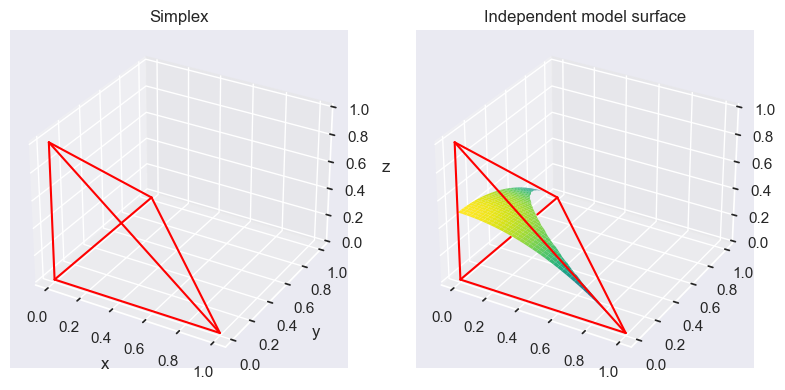

In [10]:
x = np.arange(0, 1, 0.005)
X, Y = np.meshgrid(x, x)

f = lambda x, y : -0.5*(x**2 + y**2 )+ 0.5

Z = np.full(X.shape, None)
for i in range(X.shape[0]):
    for j in range(X.shape[1]):
        if X[i, j] + Y[i, j] <= 1:
            z_value = f(X[i, j], Y[i, j])
            if 0 <= z_value <= 1 - X[i, j] - Y[i, j]:
                Z[i, j] = z_value

fig = plt.figure(figsize=plt.figaspect(0.5))

ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.plot([0, 0], [0, 0], [0, 1], color='red')
ax1.plot([0, 0], [0, 1], [0, 0], color='red')
ax1.plot([0, 1], [0, 0], [0, 0], color='red')
ax1.plot([0, 1], [1, 0], [0, 0], color='red')
ax1.plot([0, 0], [1, 0], [0, 1], color='red')
ax1.plot([1, 0], [0, 0], [0, 1], color='red')
ax1.set_title('Simplex')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.set_zlabel('z')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

ax2.plot_surface(X, Y, Z, cmap=cm.viridis,
                       linewidth=0, rstride=5, cstride=5)

ax2.plot([0, 0], [0, 0], [0, 1], color='red')

ax2.plot([0, 0], [0, 0.5], [0, 0], color='red')
ax2.plot([0, 0], [0.78, 1], [0, 0], color='red')

ax2.plot([0, 1], [0, 0], [0, 0], color='red')
ax2.plot([0, 1], [1, 0], [0, 0], color='red')
ax2.plot([0, 0], [1, 0], [0, 1], color='red')
ax2.plot([1, 0], [0, 0], [0, 1], color='red')
ax2.set_title('Independent model surface')

plt.show()

!For an independent model we get 

$$
\mathbb{P}(\mathcal{D} | indep) = \mathbb{P}(\mathcal{D}_A) \mathbb{P}(\mathcal{D}_B) = \frac{n_A ! (n - n_A)!}{(n + 1)!} \frac{n_B ! (n - n_B)!}{(n + 1)!}
$$

Now using the stirling approximation $n! \approx n^n e^{-n}$ we get

$$
\begin{align*}
    \mathbb{P}(\mathcal{D}_A) 
    &= 
    \frac{n!}{(n+1)!} \frac{n_A ! (n - n_A)!}{n!}  \\
    &= 
    \frac{1}{n+1} \frac{n_A^{n_A} e^{-n_A} (n - n_A)^{n - n_A} e^{n_A - n}}{n^n e^{-n}} \\
    &=
    \frac{1}{n+1} \frac{e^{n_A \log n_A} e^{-n_A} e^{(n - n_A) \log (n - n_A)} e^{n_A - n}}{e^{n \log n} e^{-n}} \\
    &=
    \frac{1}{n+1} \exp \left(n_A \log n_A - n_A + (n - n_A) \log (n - n_A) + n_A - n - n \log n +n\right) \\
    &=
    \frac{1}{n+1} \exp \left(n_A \log n_A  + (n - n_A) \log (n - n_A) - n \log n \right) 
\end{align*}

$$

If we now set $f_A = \frac{n_A}{n}$, we get

$$
\frac{1}{n+1} \exp \left(n (f_A \log f_A + (1 - f_A) \log (1 - f_A)) \right) = \frac{1}{n+1} \exp (- nH[f_A]) 
$$

Because $\rho_A^* = \frac{n_A}{n}$, we have $n + 1$ possibilities for $\rho_A$. Which gives that $f(Model \ A) = \frac{1}{n+1}   $  and $ \mathbb{P}(\mathcal{D} | \rho_A^* ) = e^{- nH[f_A]}$.

For the dependent model we get

$$
\mathbb{P}(\mathcal{D} | dep) = \frac{3! n_{AB}! n_{A\bar{B}}! n_{\bar{A}B}! n_{\bar{A}\bar{B}}! }{(n + 3)!}
$$

Using again the sterling approximation we get

$$
\begin{align*}
    \frac{3! n_{AB}! n_{A\bar{B}}! n_{\bar{A}B}! n_{\bar{A}\bar{B}}! }{(n + 3)!}
    &=
    \frac{3! n!}{(n + 3)!} \frac{n_{AB}! n_{A\bar{B}}! n_{\bar{A}B}! n_{\bar{A}\bar{B}}}{n!} \\
    &=
    \frac{3! n!}{(n+3)!} e^{-n H_{AB}}
\end{align*}
$$

Here then $\frac{3! n!}{(n+3)!}$ shows how many ways $(\rho_{AB}, \rho_{A\bar{B}}), \rho_{\bar{A}B} $ can be chosen. Imagine we have $n$ points and three dividers and depending on where we set these dividers we get 4 classes. Then there are in total $ \begin{pmatrix} n + 3 \\ 3 \end{pmatrix}$ ways to set these dividers, which is the inverse of our occam factor.
Looking at the posterior with a uniform prior and with the fraction $R = \frac{\mathbb{P}(D|dep, I)}{\mathbb{P}(indep, I)}$ we get the posterior

$$
\frac{R}{R + 1}
$$

With our definitions we get that 

$$
R = \frac{f_{AB}(n)}{f_A(n)f_B(n)} e^{n(H[p_A] + H[p_B] - H[p_{AB}])}
$$

The first part of this expression is the occam factors. It counts the amount of models there exist which can explain the given data. 
The ratio then given us a measure of choosing our model.
The second part if the exponent of the mutual information. 
If then $H[p_{AB}] < H[p_{A}] + H[p_{B}]$, it means that we can determine A and B more quickly when asking about them jointly then asking about them separately and vice versa. 
The mutual information measures how man questions less one needs to ask 

### Cryptic exon

Assume that we have the following data for a given cryptic exon

- $n$ transcripts in total
- $P$ different promoters used
- $i_p$ number of times exon included when promoter $p$ is used
- $e_p$ number of times exon excluded when promoter $p$ is used
- $i$ total number of times exon included
- $e$ total number of times exon excluded

In the independent model each transcript has independent probability $f$ to include the exon, with a uniform prior probability of $f$.
In the dependent model for a transcript from the prompoter $p$ the probability of including the exon is $f_p$, with a uniform prior probability over $f_p$ for each promoter $p$.

We get then for the independent model

$$
\mathbb{P}( \mathcal{D} | indep) = \int_0^1 f^i (1 - f)^e df = \frac{i! e!}{(i + e + 1)!}
$$

For the dependent model is then the product over all promoters. We integrate each promoter seperately as they don't depend on eachother so we can look at each promoter seperately and check their dependence.

$$
\mathbb{P}(\mathcal{D} | dep) = \prod_{p=1}^P \left[ \int_0^1 f_p^{i_p} (1 - f_p)^{e_p} df_p \right] = \prod_{p=1}^P \frac{i_p! e_p!}{(i_p + e_p + 1)!}
$$

To now calculate the probability of the data for all cryptic exons, we add one parameter. The so called fraction $\rho$ of all exons for which inclusion depends on the promoter. The probability of the data given $\rho$ is then

$$
\mathbb{P}(\mathcal{D} | \rho) = \prod_{\text{exons k}} \mathbb{P}(\mathcal{D}_k) 
= 
\prod_{\text{exons k}} \left[ \mathbb{P}(\mathcal{D}_k | dep) \rho + \mathbb{P}(\mathcal{D}_k | indep) (1 - \rho)  \right]
$$

The posterior is then

$$
\mathbb{P}(\rho | \mathcal{D}) = \frac{\mathbb{P}(\mathcal{D} | \rho)}{\int_0^1 \mathbb{P}(\mathcal{D} | \rho') d\rho'}
$$

### Protein structure

Because protein structure depend on the amino acids in the peptide chain, and many different amino acids sequences can fold into a protein of the same structure, we may be able to infer if there exist dependecies between certain amino acids which determine the structure of the protein. 
Let $n_{\alpha}^i$ be the number of occurrences of the letter $\alpha$ at position $i$ and let $n_{\alpha \beta}^{ij}$ be the number of occurences of the pair $\alpha \beta$ at position $ij$. 
The frequencies of these counts are then $f_{\alpha}^i = \frac{n_{\alpha}^i}{n}$ and $f_{\alpha \beta}^{ij} \frac{n_{\alpha \beta}^{ij}}{n}$ respectively. 
If then positions touch each other in the 3 dimensional structure, they will likely show some dependencies in what amino acids occur.
We therefor calculate the mutual information (amount of mutual dependence)

$$
I_{ij} = H_i + H_j - H_{ij} = \sum_{\alpha\beta} f_{\alpha\beta}^{ij} \log \left( \frac{f_{\alpha\beta}^{ij}}{f_{\alpha}^{i}f_{\beta}^{j}} \right)
$$
and we assign each pair a Z score which normalises the data 

$$
Z_{ij} = \frac{I_{ij} - \langle I \rangle}{\sigma(I)}
$$

This method doesn't work and has the reason that the high mutual information pairs form chains. If we have a chain of for example for points (i-j-k-l), then i-j may depend on each other j-k aswell and then k-l also (independently) which causes i-l to become dependent on eachother, eventhough they aren't touching.